In [157]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from joblib import dump
from sklearn.pipeline import Pipeline
import streamlit as st



In [158]:
df = pd.read_csv('spam.csv', encoding='latin1')  # most common fix
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [159]:
# 🧹 Step 2: Keep only relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [160]:
# 🧼 Step 3: Encode labels ('ham'=0, 'spam'=1) and clean
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df = df.dropna(subset=['label'])  # Drop rows where label is NaN
df.drop_duplicates(inplace=True)

In [161]:
# Describe data
df.describe()

,label
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [162]:
print(df.columns.tolist())

['label', 'message']


In [163]:
# 🧪 Step 4: Define features and target
X = df['message']
y = df['label']

In [164]:
import re
import string

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text


In [165]:
if st.checkbox("Show WordClouds & Charts"):
    spam_df = pd.read_csv("spam.csv", encoding="latin1")[['v1', 'v2']]
    spam_df.columns = ['label', 'message']
    spam_df['label'] = spam_df['label'].map({'ham': 0, 'spam': 1})
    spam_df.dropna(subset=['label'], inplace=True)
    spam_df.drop_duplicates(inplace=True)
    spam_df['message'] = spam_df['message'].apply(clean_text)


2025-08-04 19:16:10.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 19:16:10.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 19:16:10.236 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 19:16:10.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 19:16:10.239 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 19:16:10.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


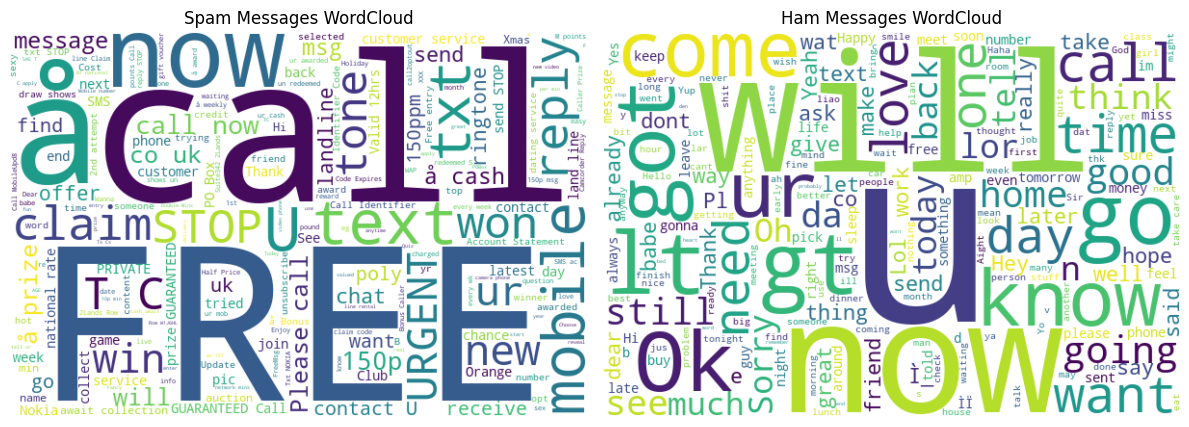

In [166]:
from wordcloud import WordCloud

# Generate wordclouds for both classes
spam_words = ' '.join(df[df['label'] == 1]['message'])
ham_words = ' '.join(df[df['label'] == 0]['message'])

spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages WordCloud')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Messages WordCloud')

plt.tight_layout()
plt.show()


In [167]:
df['message'] = df['message'].apply(clean_text)


In [168]:
# ✨ Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_vectorized = vectorizer.fit_transform(X)

# ✂️ Now split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


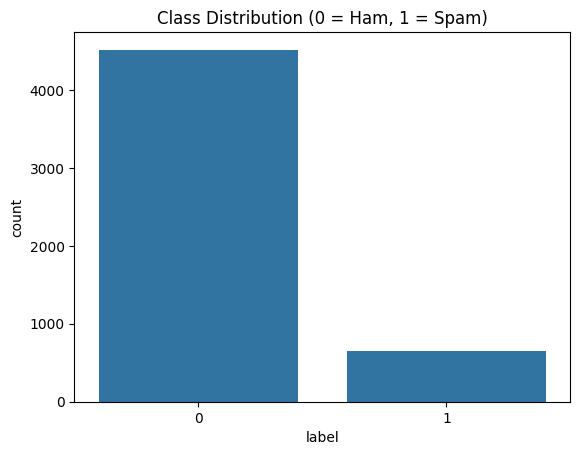

In [169]:
sns.countplot(x='label', data=df)
plt.title('Class Distribution (0 = Ham, 1 = Spam)')
plt.show()


In [170]:
results_df = pd.DataFrame({'Message': X_test, 'Actual': y_test, 'Predicted': y_pred})
results_df.to_csv('spam_predictions.csv', index=False)


In [171]:
# 🧠 Step 7: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [172]:
probs = model.predict_proba(X_test)
print("Example confidence score (first prediction):", max(probs[0]))


Example confidence score (first prediction): 0.9295578138265393


In [173]:
# 📈 Step 8: Predict on test data
y_pred = model.predict(X_test)

In [174]:
# ✅ Step 9: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9458413926499033

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       889
           1       0.98      0.63      0.76       145

    accuracy                           0.95      1034
   macro avg       0.96      0.81      0.87      1034
weighted avg       0.95      0.95      0.94      1034



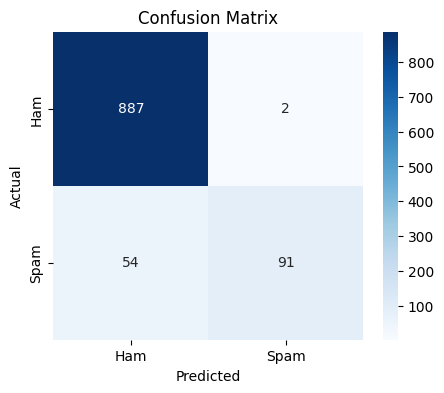

In [175]:
# 📊 Step 10: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [176]:
# 💾 Step 11: Save the model and vectorizer
dump(model, 'spam_model.joblib')
dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

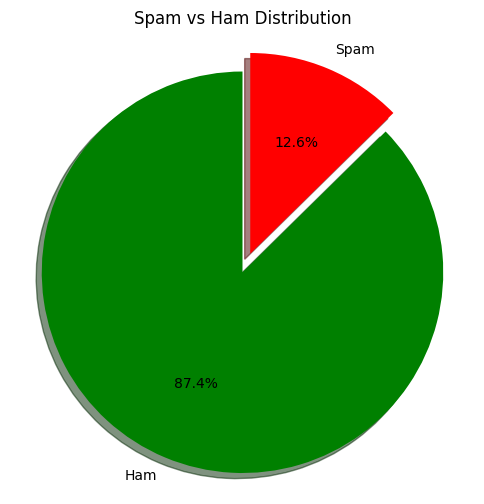

In [177]:
# 🧮 Count label values before pie chart
label_counts = df['label'].value_counts()  # 0 = Ham, 1 = Spam

# 🥧 Pie chart
labels = ['Ham', 'Spam']
sizes = [label_counts[0], label_counts[1]]
colors = ['green', 'red']
explode = (0.05, 0.05)  # Slight separation

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True)
plt.title('Spam vs Ham Distribution')
plt.axis('equal')  # Equal aspect ratio ensures it's a circle
plt.show()


In [181]:
print(vectorizer.get_feature_names_out()[:20])  # first 20 words


['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '01223585334' '0125698789' '02' '0207' '02072069400' '02073162414'
 '02085076972' '021' '03' '04' '0430' '05' '050703']


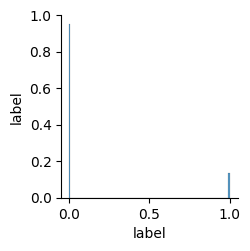

In [179]:
sns.pairplot(df, kind='reg')

In [182]:
dump(model, 'spam_model.joblib')


['spam_model.joblib']

In [183]:
from joblib import load

# Load saved model and vectorizer
model = load('spam_model.joblib')
vectorizer = load('tfidf_vectorizer.joblib')

# Predict sample message
msg = ["Congratulations! You've won a prize."]
msg_vec = vectorizer.transform(msg)
prediction = model.predict(msg_vec)

print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")


Prediction: Ham
